In [45]:
# Standard Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Custom Modules
from bar_plot import plot_name_values

# Scikit-learn Modules
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import auc, mean_absolute_error, mean_squared_error, roc_curve, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scipy
from scipy.stats import zscore

# Preprocessing 


In [46]:
# dataset Reading
df = pd.read_csv('vgsales.csv')

# Column selecting
columns = ['Year', 'Platform', 'Genre', 'Publisher', 'Global_Sales']
df = df[columns]

numeric_cols = ['Year', 'Global_Sales']
# Apply scaling to numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nFeature scaling applied to numeric columns!")

# Handle outliers using Z-scores
for col in numeric_cols:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Fill missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Replace missing values ​​for categorical columns
categorical_cols = ['Platform', 'Genre', 'Publisher']

top_platforms = df['Platform'].value_counts().nlargest(10).index
df['Platform'] = df['Platform'].apply(lambda x: x if x in top_platforms else 'Other')
top_genres = df['Genre'].value_counts().nlargest(10).index
df['Genre'] = df['Genre'].apply(lambda x: x if x in top_genres else 'Other')
top_publishers = df['Publisher'].value_counts().nlargest(10).index
df['Publisher'] = df['Publisher'].apply(lambda x: x if x in top_publishers else 'Other')

df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
print("\nMissing values filled successfully!")

# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nEncoded categorical columns!")

# Splitting data into Training Set and Testing Set
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets!")

# Display the dataset after preprocessing
print("\nDataset after Preprocessing:")
print(df.head())
print(f"Number of training records: {len(X_train)}")
print(f"Number of testing records: {len(X_test)}")


Missing values filled successfully!

Encoded categorical columns!

Feature scaling applied to numeric columns!

Outliers removed using Z-scores!

Data split into training and testing sets!

Dataset after Preprocessing:
         Year  Global_Sales  Platform_GBA  Platform_Other  Platform_PC  \
208  0.275653      2.844124         False           False        False   
209  0.102673      2.844124         False           False        False   
210  0.102673      2.831262         False           False        False   
211 -0.243286      2.811969         False           False        False   
212  0.102673      2.805539         False           False        False   

     Platform_PS  Platform_PS2  Platform_PS3  Platform_PSP  Platform_Wii  ...  \
208        False         False         False         False         False  ...   
209        False         False         False         False         False  ...   
210        False         False          True         False         False  ...   
211        

# Linear Regression Model

In [47]:
# --- Linear Regression Model ---
# Create and train the Linear Regression model
lr_model = LinearRegression()
print("\nLinear Regression model created successfully!")
lr_model.fit(X_train, y_train)
print("\nLinear Regression model trained successfully!")

# Test the Linear Regression model
y_pred_lr = lr_model.predict(X_test)
print("\nLinear Regression model tested!")

# Evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")


Linear Regression model created successfully!

Linear Regression model trained successfully!

Linear Regression model tested!

Linear Regression:
Mean Squared Error (MSE): 0.1636
Mean Absolute Error (MAE): 0.2381
R-squared: 0.1249


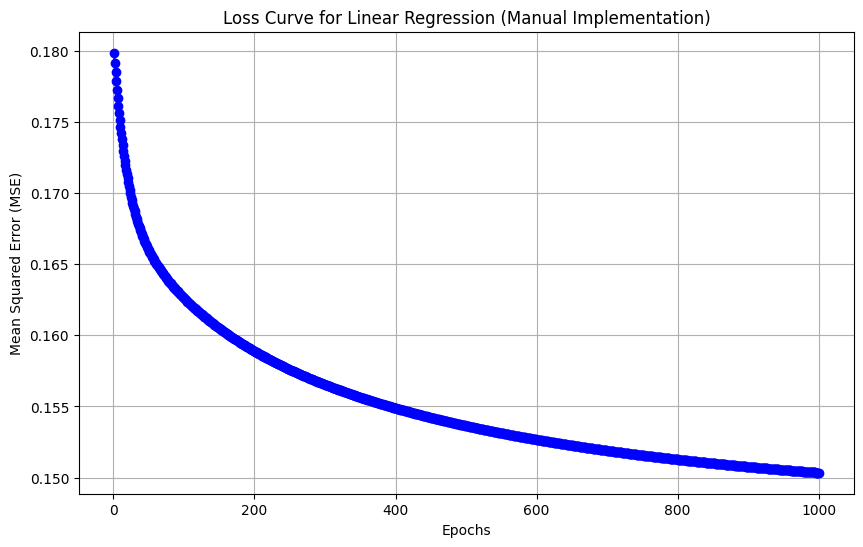

In [48]:
X_train_np = X_train.to_numpy().astype(np.float64)
y_train_np = y_train.to_numpy().reshape(-1, 1).astype(np.float64)


X_train_b = np.c_[np.ones((X_train_np.shape[0], 1)), X_train_np]

n_features = X_train_b.shape[1]
theta = np.zeros((n_features, 1))

learning_rate = 0.01
n_epochs = 1000

train_loss = []

for epoch in range(n_epochs):
    y_train_pred = X_train_b @ theta
    train_loss.append(np.mean((y_train_pred - y_train_np) ** 2))
    gradients = (2 / X_train_b.shape[0]) * X_train_b.T @ (y_train_pred - y_train_np)
    theta -= learning_rate * gradients

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_loss, label="Training Loss (MSE)", color="blue", marker="o")
plt.title("Loss Curve for Linear Regression (Manual Implementation)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()
plt.show()

# KNN Model

In [49]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN Model ---
# Create and train the KNN model
n_neighbors = 5
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
print(f"\nKNN model with {n_neighbors} neighbors created successfully!")
knn_model.fit(X_train_scaled, y_train)
print("\nKNN model trained successfully!")

# Test the KNN model
y_pred_knn = knn_model.predict(X_test_scaled)
print("\nKNN model tested!")

# Evaluation metrics for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Display evaluation results
print("\nKNN Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"R-squared: {r2_knn:.4f}")

# --- Residual Analysis ---
residuals_knn = y_test.reset_index(drop=True) - y_pred_knn



    
    

# Tune the number of neighbors (optional, uncomment to use)
# results = tune_knn(X_train_scaled, X_test_scaled, y_train, y_test)
# print(results)


KNN model with 5 neighbors created successfully!

KNN model trained successfully!

KNN model tested!

KNN Model Evaluation:
Mean Squared Error (MSE): 0.1684
Mean Absolute Error (MAE): 0.2356
R-squared: 0.0994


# Implementation details

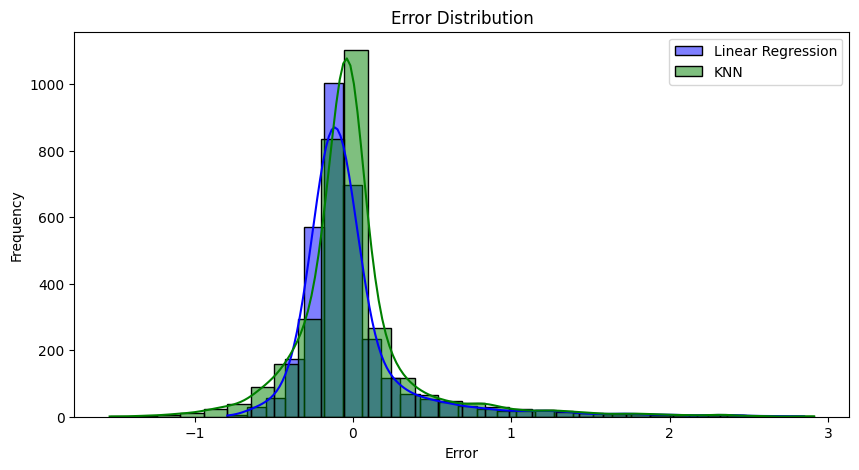


Accuracy Metrics (R2 Score):
Linear Regression R2 Score: 0.1249
KNN R2 Score: 0.0994

Mean Absolute Error (MAE):
Linear Regression: 0.2381
KNN: 0.2356

Root Mean Squared Error (RMSE):
Linear Regression: 0.4045
KNN: 0.4104


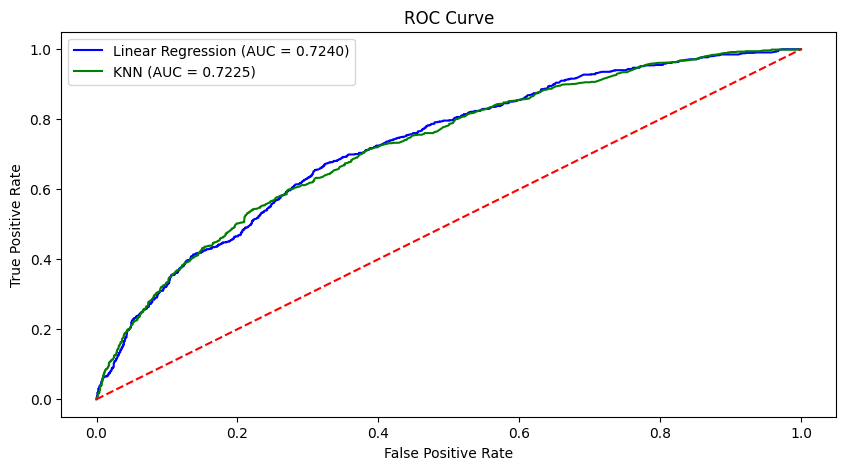

In [50]:
# --- Loss Curve (Error Distribution) ---
plt.figure(figsize=(10, 5))
sns.histplot(y_test - y_pred_lr, bins=30, kde=True, color="blue", label="Linear Regression")
sns.histplot(y_test - y_pred_knn, bins=30, kde=True, color="green", label="KNN")
plt.title("Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- Accuracy Metrics ---
print("\nAccuracy Metrics (R2 Score):")
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"Linear Regression R2 Score: {r2_lr:.4f}")
print(f"KNN R2 Score: {r2_knn:.4f}")

# --- Precision & Recall (Proxy using Regression Errors) ---
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("\nMean Absolute Error (MAE):")
print(f"Linear Regression: {mae_lr:.4f}")
print(f"KNN: {mae_knn:.4f}")
print("\nRoot Mean Squared Error (RMSE):")
print(f"Linear Regression: {rmse_lr:.4f}")
print(f"KNN: {rmse_knn:.4f}")

# --- ROC and AUC (Pseudo Classification by Thresholding) ---
# Scale predictions to [0, 1] for pseudo-ROC
scaler = MinMaxScaler()
y_pred_lr_scaled = scaler.fit_transform(y_pred_lr.reshape(-1, 1)).flatten()
y_pred_knn_scaled = scaler.fit_transform(y_pred_knn.reshape(-1, 1)).flatten()

fpr_lr, tpr_lr, _ = roc_curve(y_test > y_test.mean(), y_pred_lr_scaled)
fpr_knn, tpr_knn, _ = roc_curve(y_test > y_test.mean(), y_pred_knn_scaled)

auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Linear Regression (AUC = {auc_lr:.4f})", color="blue")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.4f})", color="green")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Visualization

In [51]:
# --- Visualization ---
# Plotting the distribution of the target variable
fig = px.histogram(y, nbins=30, marginal="violin", title="Distribution of Global Sales", 
                   labels={'value': 'Global Sales'}, opacity=0.75, histnorm='density')
fig.update_traces(marker_color='blue')  # Removed the 'line' argument
fig.update_layout(xaxis_title="Global Sales", yaxis_title="Frequency")
fig.show()

# Plotting the actual vs predicted values for Linear Regression
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_lr, mode='markers', name='Predicted', marker=dict(color='blue', size=8)))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Actual', line=dict(color='red', dash='dash')))
fig.update_layout(title="Linear Regression: Actual vs Predicted",
                  xaxis_title="Actual Values",
                  yaxis_title="Predicted Values",
                  legend_title="Legend")
fig.show()

# Plotting the actual vs predicted values for KNN
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_knn, mode='markers', name='Predicted', marker=dict(color='green', size=8)))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Actual', line=dict(color='red', dash='dash')))
fig.update_layout(title="KNN: Actual vs Predicted",
                  xaxis_title="Actual Values",
                  yaxis_title="Predicted Values",
                  legend_title="Legend")
fig.show()


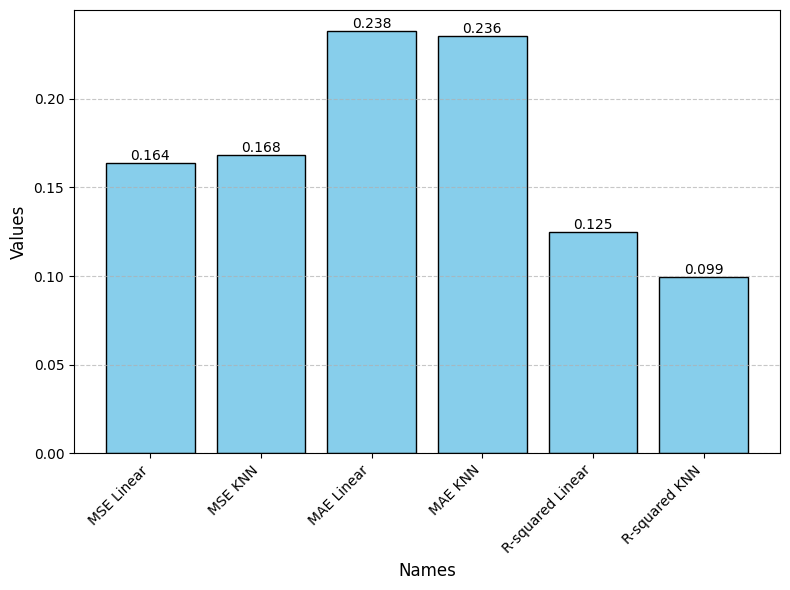

In [52]:
plot_name_values([("MSE Linear", mse_lr), ("MSE KNN", mse_knn), ("MAE Linear", mae_lr), ("MAE KNN", mae_knn), ("R-squared Linear", r2_lr), ("R-squared KNN", r2_knn)])